# Sentiment Analysis of Svevo Letter Corpus

### Part 2: Evaluating sentiment values

We draw plots and create dataframes in order to evaluate the connection between sentiment and individuals, the sentiment associated with different periods of Svevo's life and finally the sentiment associated with the topics we found during our topic modeling.

Some graphs are directly presented here, the others were created using [RAW](http://app.rawgraphs.io/) and are presented in the results folder.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Our original dataset including all letters in all languages.
data = pd.read_csv('datasets/carteggio.svevo3.csv', sep=';', parse_dates=['date'])

# Our dataset produced by the sentiment_analysis_extraction notebook
sent = pd.read_csv('datasets/sentiment.csv', sep=',')

# Put the sent dataframe in the right form
sent = sent.fillna(0)
sent["index"] = sent["index"] - 1

# This 12 corpus correspond to >95% of the total of the letters sent and received by Svevo through his life.
top_corpus = ['Schmitz Henri Michel', 'Schmitz Joyce', 'Schmitz Letizia', 'Schmitz Livia', ' Schmitz Ottavio',
              'Schmitz Pasini', 'Schmitz Prezzolini', 'Svevo Comnène', 'Svevo Crémieux', 'Svevo Jahier', 'Svevo Larbaud',
              'Svevo Montale']

We create an unstacked dataset containing all original fields with sentiment added.

In [86]:
data_unstacked = data

data_unstacked["anger"] = sent["anger"]
data_unstacked["anticipation"] = sent["anticipation"]
data_unstacked["disgust"] = sent["disgust"]
data_unstacked["fear"] = sent["fear"]
data_unstacked["joy"] = sent["joy"]
data_unstacked["sadness"] = sent["sadness"]
data_unstacked["surprise"] = sent["surprise"]
data_unstacked["trust"] = sent["trust"]
data_unstacked["negative"] = sent["negative"]
data_unstacked["positive"] = sent["positive"]

data_unstacked.to_csv('datasets/svevo_with_sentiment.csv')

We create the same as the previous dataset, but grouped by corpus.

In [88]:
group = data_unstacked.groupby('corpus')
corpus_sent = group.mean()
corpus_sent.drop(['n', 'index', 'year'], axis=1, inplace=True)
corpus_sent["size"] = group.size()
corpus_sent.sort_values(by="size", inplace=True, ascending=False)
corpus_sent.to_csv('datasets/sentiment_by_corpus.csv')

We create the same as the first dataset, now grouped by year.

In [ ]:
group = data_unstacked.groupby(['year'])
year_sent = group.mean()
corpus_sent.drop(['n', 'index'], axis=1, inplace=True)
year_sent.sort_values(by="year", inplace=True, ascending=True)
year_sent.to_csv('datasets/sentiment_by_year.csv')

We create the same as the first dataset, grouped by corpus and year, only for top_corpus letters.

In [89]:
filter_corpus = data_unstacked[data_unstacked['corpus'].isin(top_corpus)]
group = filter_corpus.groupby(['year','corpus'])
year_sent_topcorpus = group.mean()
year_sent_topcorpus["size"] = group.size()/100.0
year_sent_topcorpus.sort_values(by="year", inplace=True, ascending=True)
year_sent_topcorpus.to_csv('datasets/sentiment_by_year_topcorpus.csv')

Now we use the original dataset to produce a stacked version of the sentiment dataset.

In [91]:
sent_noid = sent.drop('index', axis=1)
sent_stacked = sent_noid.stack().reset_index()
sent_stacked.columns = ['index','sentiment','intensity']
new_data = sent_stacked.set_index('index').join(data.set_index('n'),how='left')
new_data.to_csv('datasets/sentiment_stacked.csv')

We group the stacked version by year and sentiment

In [92]:
grouped = new_data.groupby(['year', 'sentiment'])
year_sent_stacked = grouped.mean().reset_index()
year_sent_stacked.sort_values(by="year", inplace=True, ascending=True)

We plot the sentiment in relation with the year, in a complete and a partial way including only "positive" and "negative"

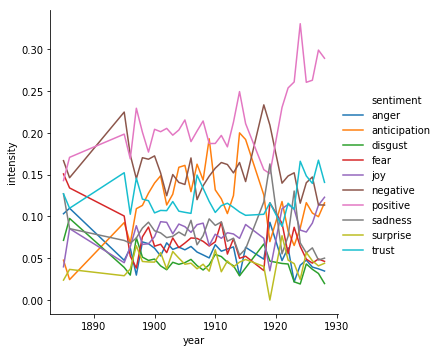

In [93]:
ax = sns.relplot(x="year", y="intensity", hue="sentiment", data=year_sent_stacked, kind='line')

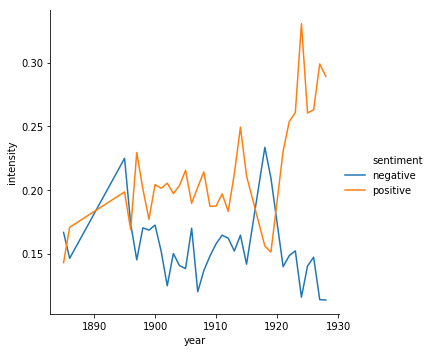

In [96]:
year_posneg = year_sent_stacked[year_sent_stacked['sentiment'].isin(['positive', 'negative'])]
ax = sns.relplot(x="year", y="intensity", hue="sentiment", data=year_posneg, kind='line')

Lastly, we produce a stacked dataset grouped by topic and sentiment

In [97]:
topics = pd.read_csv('datasets/svevo_topics.csv')
top_sent = sent_stacked.set_index('index').join(topics.set_index('n'),how='right')
grouped = top_sent.groupby(['lbl', 'sentiment'])
top_sent = grouped.mean().reset_index()
top_sent.to_csv('datasets/sentiment_by_topic.csv')